In [1]:
import numpy as np
import tensorflow as tf
from keras import datasets, layers, models, Input, Model
import matplotlib.pyplot as plt

# 21BCE2067 Kshitiz Bhargava

In [2]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images to values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the images to add a channel dimension
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# 21BCE2067 Kshitiz Bhargava

In [3]:
# Define an Inception block
def inception_block(x, filters):
    f1, f3_reduce, f3, f5_reduce, f5, pool_proj = filters
    
    # 1x1 convolution branch
    branch_1x1 = layers.Conv2D(f1, kernel_size=1, padding='same', activation='relu')(x)
    
    # 3x3 convolution branch
    branch_3x3 = layers.Conv2D(f3_reduce, kernel_size=1, padding='same', activation='relu')(x)
    branch_3x3 = layers.Conv2D(f3, kernel_size=3, padding='same', activation='relu')(branch_3x3)
    
    # 5x5 convolution branch
    branch_5x5 = layers.Conv2D(f5_reduce, kernel_size=1, padding='same', activation='relu')(x)
    branch_5x5 = layers.Conv2D(f5, kernel_size=5, padding='same', activation='relu')(branch_5x5)
    
    # 3x3 MaxPooling branch
    branch_pool = layers.MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = layers.Conv2D(pool_proj, kernel_size=1, padding='same', activation='relu')(branch_pool)
    
    # Concatenate all the branches
    x = layers.Concatenate(axis=-1)([branch_1x1, branch_3x3, branch_5x5, branch_pool])
    
    return x

# 21BCE2067 Kshitiz Bhargava

In [4]:
# Build the InceptionNet model
def build_inceptionnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Conv layer
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Inception blocks
    x = inception_block(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_block(x, filters=[128, 128, 192, 32, 96, 64])

    # MaxPooling
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # More Inception blocks
    x = inception_block(x, filters=[192, 96, 208, 16, 48, 64])
    x = inception_block(x, filters=[160, 112, 224, 24, 64, 64])
    
    # Global Average Pooling and output layer
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs, outputs)
    return model

# 21BCE2067 Kshitiz Bhargava

In [5]:
# Set input shape and number of classes
input_shape = (28, 28, 1)
num_classes = 10

# Build and compile the model
model = build_inceptionnet(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 21BCE2067 Kshitiz Bhargava

In [6]:
# Print the model summary
model.summary()

# 21BCE2067 Kshitiz Bhargava

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 14, 14,    │      3,200 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 7, 7, 64)  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 7, 7, 96)  │      6,240 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 7, 7, 16)  │      1,040 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 7, 7, 64)  │          0 │ max_pooling2d[0]… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 7, 7, 64)  │      4,160 │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 7, 7, 128) │    110,720 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 7, 7, 32)  │     12,832 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 7, 7, 32)  │      2,080 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 7, 7, 256) │          0 │ conv2d_1[0][0],   │
│ (Concatenate)       │                   │            │ conv2d_3[0][0],   │
│                     │                   │            │ conv2d_5[0][0],   │
│                     │                   │            │ conv2d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 7, 7, 128) │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 7, 7, 32)  │      8,224 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 7, 7, 256) │          0 │ concatenate[0][0] │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 7, 7, 128) │     32,896 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 7, 7, 192) │    221,376 │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 7, 7, 96)  │     76,896 │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 7, 7, 64)  │     16,448 │ max_pooling2d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 7, 7, 480) │          0 │ conv2d_7[0][0],   │
│ (Concatenate)       │                   │            │ conv2d_9[0][0],   │
│                     │                   │            │ conv2d_11[0][0],  │
│                     │                   │            │ conv2d_12[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,359,474 (5.19 MB)

 Trainable params: 1,359,474 (5.19 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

# 21BCE2067 Kshitiz Bhargava

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.6759 - loss: 0.8378 - val_accuracy: 0.8275 - val_loss: 0.4500
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.8717 - loss: 0.3454 - val_accuracy: 0.8860 - val_loss: 0.3215
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.8950 - loss: 0.2868 - val_accuracy: 0.8937 - val_loss: 0.2956
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9086 - loss: 0.2507 - val_accuracy: 0.8762 - val_loss: 0.3289
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9157 - loss: 0.2223 - val_accuracy: 0.9075 - val_loss: 0.2539
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9218 - loss: 0.2083 - val_accuracy: 0.9023 - val_loss: 0.2774
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9291 - loss: 0.1897 - val_accuracy: 0.9092 - val_loss: 0.2638
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 59ms/step - accuracy: 0.9339 - loss: 0.1793 - 

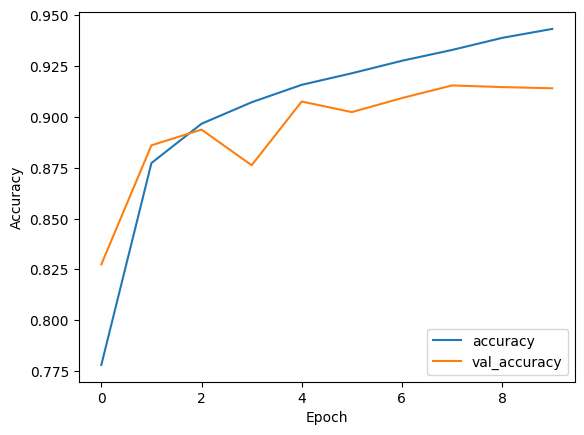

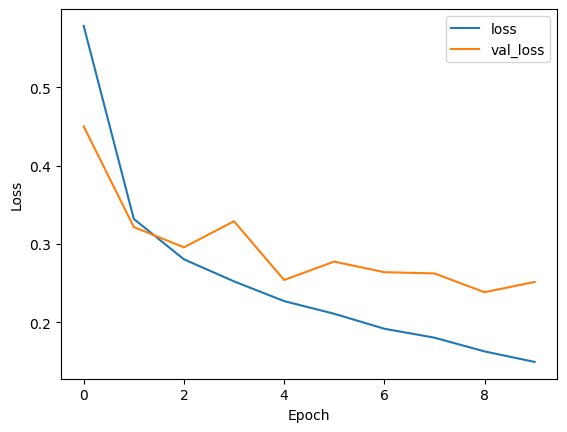

In [8]:
# Plot accuracy and loss curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

# 21BCE2067 Kshitiz Bhargava

In [9]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# 21BCE2067 Kshitiz Bhargava

313/313 - 4s - 13ms/step - accuracy: 0.9140 - loss: 0.2514
Test accuracy: 0.9139999747276306
